In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df=pd.read_csv('churn_ dataset.csv')

In [3]:
# Step 2: Convert data type of variables which are misclassified
def convert_misclassified_columns(df):
    misclassified_columns = df.columns[df.dtypes != 'float64']
    df[misclassified_columns] = df[misclassified_columns].astype('float64')
    return df

df_corrected = convert_misclassified_columns(df)

In [4]:
df.dtypes

s6.new.rev.p2.m2              float64
s1.new.rev.m1                 float64
s3.og.rev.4db.p5              float64
s3.new.rev.4db.p5             float64
s4.usg.ins.p2                 float64
                               ...   
s3.og.rev.all.m2              float64
s3.new.rev.m2                 float64
prop.og.mou.any.p6            float64
prop.loc.i2i.mou.og.mou.p3    float64
s3.rev.p1                     float64
Length: 111, dtype: object

In [5]:
# Step 3: Remove duplicate values
df.drop_duplicates(inplace=True)


In [6]:
df[df.duplicated()]

,s6.new.rev.p2.m2,s1.new.rev.m1,s3.og.rev.4db.p5,s3.new.rev.4db.p5,s4.usg.ins.p2,s4.og.unq.any.p2,s2.rch.val.p6,s1.og.rev.all.m1,s8.new.rev.p6,s4.loc.ic.ins.p1,...,prop.og.mou.tot.mou.all.p6,prop.i2i.og.mou.p6,s4.loc.ic.ins.p2,s4.std.ic.ins.l14,s4.low.blnc.ins.p4,s3.og.rev.all.m2,s3.new.rev.m2,prop.og.mou.any.p6,prop.loc.i2i.mou.og.mou.p3,s3.rev.p1


In [7]:
# Step 4: Removing Unique value variables
def remove_unique_value_variables(df):
    unique_value_variables = [col for col in df.columns if df[col].nunique() == len(df)]
    df = df.drop(columns=unique_value_variables)
    return df

df_corrected = remove_unique_value_variables(df)

In [8]:
df_corrected

,s6.new.rev.p2.m2,s1.new.rev.m1,s3.og.rev.4db.p5,s3.new.rev.4db.p5,s4.usg.ins.p2,s4.og.unq.any.p2,s2.rch.val.p6,s1.og.rev.all.m1,s8.new.rev.p6,s4.loc.ic.ins.p1,...,prop.og.mou.tot.mou.all.p6,prop.i2i.og.mou.p6,s4.loc.ic.ins.p2,s4.std.ic.ins.l14,s4.low.blnc.ins.p4,s3.og.rev.all.m2,s3.new.rev.m2,prop.og.mou.any.p6,prop.loc.i2i.mou.og.mou.p3,s3.rev.p1
0,-0.76,88.0482,3.106604,3.754955,4.0,14.0,39.29,57.320,-0.17,1.0,...,0.454642,0.497397,4.0,0.0,9.0,6.02,8.20,46.465636,0.609456,0.22
1,-0.98,67.5039,3.094574,5.550865,1.0,2.0,21.67,38.700,-0.32,3.0,...,0.343190,0.767617,6.0,0.0,20.0,3.66,8.10,34.525456,1.000000,0.38
2,-0.98,33.9248,2.324016,2.438114,2.0,3.0,30.00,15.320,-0.05,3.0,...,0.101838,0.619034,6.0,1.0,19.0,4.33,4.36,10.298451,0.699592,0.11
3,-0.92,82.6780,2.630749,2.858961,2.0,3.0,50.00,51.956,-0.18,4.0,...,0.066602,0.437088,7.0,2.0,11.0,3.40,3.53,6.670783,0.086617,5.18
4,-0.97,96.8379,2.674316,2.912397,3.0,2.0,22.50,66.886,0.01,4.0,...,0.219821,0.585977,6.0,1.0,14.0,3.85,3.87,21.998905,0.683105,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.21,132.0365,2.652236,2.857739,5.0,8.0,26.67,123.396,-0.16,4.0,...,0.145831,0.200151,7.0,0.0,18.0,3.57,3.83,14.896154,0.328027,0.76
24996,0.80,77.0154,3.763389,5.012503,2.0,8.0,27.88,62.140,0.19,4.0,...,0.529829,0.169835,7.0,0.0,18.0,6.89,7.70,55.156230,0.288006,12.74
24997,0.01,148.8337,3.823940,4.334250,6.0,10.0,10.00,98.900,-0.03,2.0,...,0.327245,0.407944,3.0,0.0,12.0,6.63,7.48,33.222018,0.235918,8.07
24998,0.17,1012.4398,14.667580,14.579567,7.0,67.0,42.92,734.005,0.70,4.0,...,0.824671,0.889239,7.0,1.0,1.0,19.36,22.26,82.549378,0.952962,21.21


In [9]:
# Step 5: Removing Zero variance Variables
zero_var_cols = df.columns[df.var() == 0]
df = df.drop(zero_var_cols, axis=1)

In [10]:
# Step 5: Treatment of Outliers
def treat_outliers_winsorization(df, lower_limit=0.25, upper_limit=0.75):
    for column in df.columns:
        lower_bound = df[column].quantile(lower_limit)
        upper_bound = df[column].quantile(upper_limit)
        df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

df_winsor = treat_outliers_winsorization(df_corrected)
print(df_winsor)

       s6.new.rev.p2.m2  s1.new.rev.m1  s3.og.rev.4db.p5  s3.new.rev.4db.p5  \
0                 -0.58      101.56380          3.106604           3.754955   
1                 -0.58      101.56380          3.094574           5.550865   
2                 -0.58      101.56380          2.367288           3.318825   
3                 -0.58      101.56380          2.630749           3.318825   
4                 -0.58      101.56380          2.674316           3.318825   
...                 ...            ...               ...                ...   
24995              0.21      132.03650          2.652236           3.318825   
24996              0.28      101.56380          3.763389           5.012503   
24997              0.01      148.83370          3.823940           4.334250   
24998              0.17      370.71165          5.993342           8.395736   
24999             -0.58      275.35300          5.134579           5.954062   

       s4.usg.ins.p2  s4.og.unq.any.p2  s2.rch.val.

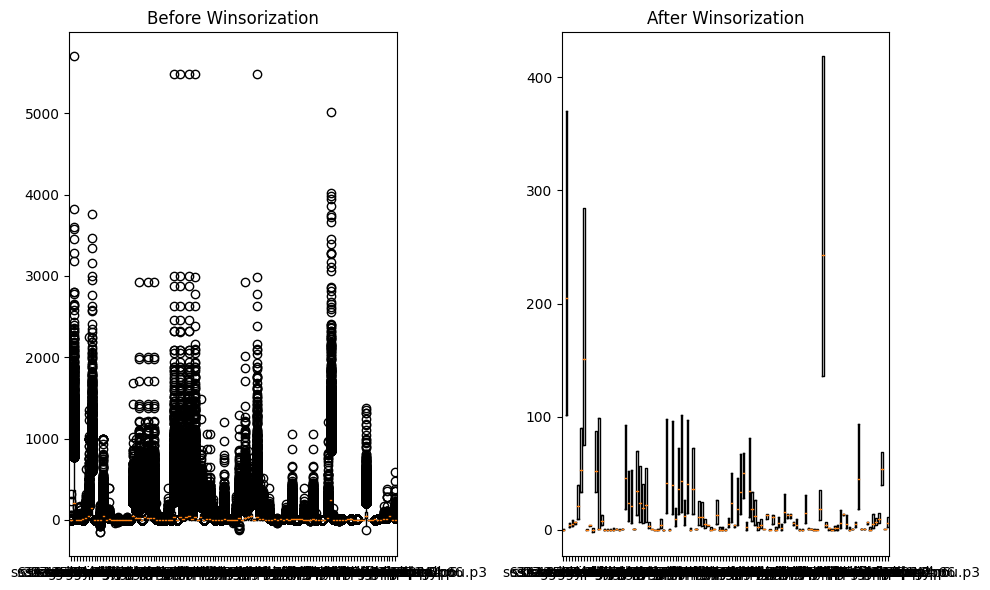

In [11]:
plt.figure(figsize=(10, 6))

# Before winsorization
plt.subplot(1, 2, 1)
plt.boxplot(df.values, labels=df.columns)
plt.title('Before Winsorization')

# After winsorization
plt.subplot(1, 2, 2)
plt.boxplot(df_winsor.values, labels=df_winsor.columns)
plt.title('After Winsorization')

plt.tight_layout()
plt.show()

In [12]:
# Step 7: Missing Value Treatment
df.fillna(df.mean(), inplace=True)

In [13]:
correlation_matrix = df.corr().abs()
highly_correlated_mask = correlation_matrix > 0.95
np.fill_diagonal(highly_correlated_mask.values, False)
correlated_pairs = np.where(highly_correlated_mask)
features_to_remove = set()
for feature1, feature2 in zip(*correlated_pairs):
    if feature1 < feature2:
        features_to_remove.add(feature1)
    else:
        features_to_remove.add(feature2)

df = df.drop(df.columns[list(features_to_remove)], axis=1)

In [14]:
df

,s6.new.rev.p2.m2,s1.new.rev.m1,s3.new.rev.4db.p5,s4.og.unq.any.p2,s2.rch.val.p6,s1.og.rev.all.m1,s8.new.rev.p6,s4.loc.ic.ins.p1,s8.mbl.p2,s2.rch.val.l67,...,s1.rev.p2,prop.i2i.og.mou.p6,s4.loc.ic.ins.p2,s4.std.ic.ins.l14,s4.low.blnc.ins.p4,s3.og.rev.all.m2,s3.new.rev.m2,prop.og.mou.any.p6,prop.loc.i2i.mou.og.mou.p3,s3.rev.p1
0,-0.76,88.0482,3.754955,14.0,39.29,57.320,-0.17,1.0,-0.72,39.44,...,6.3180,0.497397,4.0,0.0,9.0,6.02,8.20,46.465636,0.609456,0.22
1,-0.98,67.5039,5.550865,2.0,21.67,38.700,-0.32,3.0,-0.08,18.89,...,0.7562,0.767617,6.0,0.0,20.0,3.66,8.10,34.525456,1.000000,0.38
2,-0.98,33.9248,2.438114,3.0,30.00,15.320,-0.05,3.0,-0.09,29.50,...,0.5174,0.619034,6.0,1.0,19.0,4.33,4.36,10.298451,0.699592,0.11
3,-0.92,82.6780,2.858961,3.0,50.00,51.956,-0.18,4.0,1.83,46.67,...,-8.7264,0.437088,7.0,2.0,11.0,3.40,3.53,6.670783,0.086617,5.18
4,-0.97,96.8379,2.912397,2.0,22.50,66.886,0.01,4.0,-0.04,37.20,...,1.6745,0.585977,6.0,1.0,14.0,3.85,3.87,21.998905,0.683105,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.21,132.0365,2.857739,8.0,26.67,123.396,-0.16,4.0,0.76,39.17,...,20.6999,0.200151,7.0,0.0,18.0,3.57,3.83,14.896154,0.328027,0.76
24996,0.80,77.0154,5.012503,8.0,27.88,62.140,0.19,4.0,0.37,25.21,...,42.8656,0.169835,7.0,0.0,18.0,6.89,7.70,55.156230,0.288006,12.74
24997,0.01,148.8337,4.334250,10.0,10.00,98.900,-0.03,2.0,-0.79,11.30,...,20.8590,0.407944,3.0,0.0,12.0,6.63,7.48,33.222018,0.235918,8.07
24998,0.17,1012.4398,14.579567,67.0,42.92,734.005,0.70,4.0,-1.09,40.02,...,489.7368,0.889239,7.0,1.0,1.0,19.36,22.26,82.549378,0.952962,21.21


In [15]:
vif = pd.DataFrame()
X = df.drop('target',axis=1)
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
high_vif = vif[vif['VIF'] > 20]
print(len(high_vif))
print(high_vif.sort_values(by = 'VIF', ascending = False))


46
                       Feature         VIF
50              s4.usg.ins.l14  211.200490
19               s1.new.rev.p1  199.316237
51            s4.loc.og.ins.p2  195.317535
72            s4.loc.ic.ins.p2  188.181513
49           s4.loc.ic.ins.l14  170.325570
18               s1.new.rev.p2  167.554912
66              s4.loc.ins.l14  157.881601
44           s4.loc.og.ins.l14  149.395965
21            s1.og.rev.all.p1  141.164279
46              s4.dec.ins.l14  131.429876
28           s1.hom.rmg.rev.p2  105.557027
37            s4.loc.og.ins.p1  102.168338
31               s4.usg.ins.p1   99.492468
43           s7.rtd.mou.l21.p6   95.315734
32           s7.new.rev.l21.p6   86.335108
29            s7.rtd.mou.p3.p6   77.680813
7             s4.loc.ic.ins.p1   77.265256
22            s7.new.rev.p3.p6   73.998597
69               s4.dec.ins.p2   69.735806
41               s5.new.rev.p1   68.508826
70                   s1.rev.p2   58.095628
17            s7.rtd.mou.p2.p6   52.493187
39      

In [16]:
df = df.drop(high_vif['Feature'],axis = 1)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   s6.new.rev.p2.m2            25000 non-null  float64
 1   s4.og.unq.any.p2            25000 non-null  float64
 2   s2.rch.val.p6               25000 non-null  float64
 3   s8.new.rev.p6               25000 non-null  float64
 4   s8.mbl.p2                   25000 non-null  float64
 5   s2.rch.val.l67              25000 non-null  float64
 6   s7.s4.day.no.mou.p2.p4      25000 non-null  float64
 7   s3.new.rev.p3               25000 non-null  float64
 8   s7.s5.s4.day.nomou.p4       25000 non-null  float64
 9   s8.og.rev.p3                25000 non-null  float64
 10  s8.ic.mou.all.p3            25000 non-null  float64
 11  target                      25000 non-null  float64
 12  s6.rtd.mou.p2.m2            25000 non-null  float64
 13  s7.rev.p2.p6                250

In [18]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [19]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)



In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8
Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86      3437
         1.0       0.72      0.58      0.65      1563

    accuracy                           0.80      5000
   macro avg       0.77      0.74      0.75      5000
weighted avg       0.79      0.80      0.79      5000

Confusion Matrix:
[[3087  350]
 [ 650  913]]


In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [38]:
dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [40]:
print(f"Decision Tree Classifier Accuracy: {accuracy:.3f}")
print(f"Decision Tree Classifier Precision: {precision:.3f}")
print(f"Decision Tree Classifier Recall: {recall:.3f}")
print(f"Decision Tree Classifier F1-score: {f1:.3f}")

Decision Tree Classifier Accuracy: 0.709
Decision Tree Classifier Precision: 0.533
Decision Tree Classifier Recall: 0.562
Decision Tree Classifier F1-score: 0.547


In [41]:
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

In [42]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [43]:
print(f"Random Forest Accuracy: {accuracy:.3f}")
print(f"Random Forest Precision: {precision:.3f}")
print(f"Random Forest Recall: {recall:.3f}")
print(f"Random Forest F1-score: {f1:.3f}")  

Random Forest Accuracy: 0.803
Random Forest Precision: 0.726
Random Forest Recall: 0.593
Random Forest F1-score: 0.653


In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}

In [45]:
# Create the grid search object
grid_search = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Use accuracy as the scoring metric
    n_jobs=-1  # Use all available CPU cores
)

In [46]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [47]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}


In [48]:
# Get the best model
best_model = grid_search.best_estimator_

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

In [50]:
# Evaluate the best model
best_model_scores = evaluate_model(best_model, X_test, y_test)
print("Best Model Scores:", best_model_scores)

Best Model Scores: (0.812, 0.7333333333333333, 0.6263595649392194, 0.6756383712905452)


In [51]:
# Define the parameter grid for random forest classifier
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [52]:
# Create the grid search object
grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

In [53]:
# Fit the grid search to the data
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [54]:
# Get the best hyperparameters
best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters for Random Forest:", best_params_rf)

Best Hyperparameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


In [55]:
# Get the best model
best_model_rf = grid_search_rf.best_estimator_

In [56]:
# Evaluate the best model
best_model_rf_scores = evaluate_model(best_model_rf, X_test, y_test)
print("Best Random Forest Model Scores:", best_model_rf_scores)

Best Random Forest Model Scores: (0.8052, 0.7274131274131274, 0.6026871401151631, 0.6592022393282014)


In [57]:
# Define the parameter grid for decision tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [58]:
# Create the grid search object
grid_search_dt = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_dt,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Use accuracy as the scoring metric
    n_jobs=-1  # Use all available CPU cores
)

In [59]:
# Fit the grid search to the data
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [60]:
# Get the best hyperparameters
best_params_dt = grid_search_dt.best_params_
print("Best Hyperparameters for Decision Tree:", best_params_dt)

Best Hyperparameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [61]:
# Get the best model
best_model_dt = grid_search_dt.best_estimator_

In [62]:
best_model_dt_scores = evaluate_model(best_model_dt, X_test, y_test)
print("Best Decision Tree Model Scores:", best_model_dt_scores)

Best Decision Tree Model Scores: (0.7774, 0.6642335766423357, 0.582213691618682, 0.6205250596658711)
